Data from:
http://www3.dsi.uminho.pt/pcortez/wine/

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Thanks to:


P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Attribute Information:


For more information, read [Cortez et al., 2009]. 
Input variables (based on physicochemical tests): 


1 - fixed acidity 


2 - volatile acidity 


3 - citric acid 


4 - residual sugar 


5 - chlorides 


6 - free sulfur dioxide 


7 - total sulfur dioxide 


8 - density 


9 - pH 


10 - sulphates 


11 - alcohol 


Output variable (based on sensory data): 


12 - quality (score between 0 and 10)

In [1]:
! dir winequality/winequality-red.csv

El formato del par metro no es correcto: "winequality-red.csv".


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_red = pd.read_table('./winequality/winequality-red.csv', sep=';')
data_red['red']=1
data_white = pd.read_table('./winequality/winequality-white.csv', sep=';')
data_white['white']=1


#Create just one dataset
data = data_red.append(data_white, ignore_index=True)
data.fillna(0, inplace=True)
data.sample(5)

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,quality,red,residual sugar,sulphates,total sulfur dioxide,volatile acidity,white
3645,9.300000,0.046,0.43,0.99820,8.3,22.0,3.38,5,0.0,9.2,0.47,126.0,0.33,1.0
5957,9.533333,0.050,0.20,0.99504,6.5,44.0,3.18,5,0.0,7.5,0.48,179.0,0.23,1.0
2845,10.600000,0.055,0.40,0.99530,8.0,41.0,3.18,7,0.0,5.2,0.40,167.0,0.20,1.0
4770,12.000000,0.048,0.39,0.99044,7.3,24.0,2.94,6,0.0,2.3,0.35,87.0,0.20,1.0
1908,10.400000,0.037,0.26,0.99280,6.2,36.0,3.21,6,0.0,4.8,0.41,148.0,0.31,1.0


In [95]:
data.shape

(6497, 14)

## Data exploration:

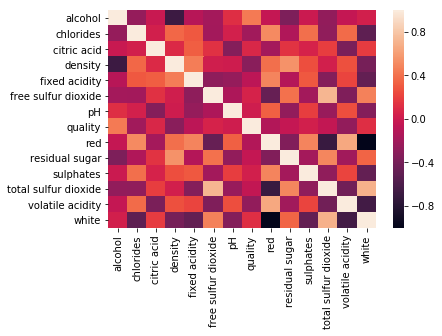

In [4]:
#Correlation matrix:

sns.heatmap(data.corr())

In [5]:
data['total sulfur dioxide'].corr(data['free sulfur dioxide'])

0.7209340813785245

In [6]:
data['alcohol'].corr(data['density'])

-0.6867454216821347

In [7]:
data.describe()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,quality,red,residual sugar,sulphates,total sulfur dioxide,volatile acidity,white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,0.056034,0.318633,0.994697,7.215307,30.525319,3.218501,5.818378,0.246114,5.443235,0.531268,115.744574,0.339666,0.753886
std,1.192712,0.035034,0.145318,0.002999,1.296434,17.749400,0.160787,0.873255,0.430779,4.757804,0.148806,56.521855,0.164636,0.430779
min,8.000000,0.009000,0.000000,0.987110,3.800000,1.000000,2.720000,3.000000,0.000000,0.600000,0.220000,6.000000,0.080000,0.000000
25%,9.500000,0.038000,0.250000,0.992340,6.400000,17.000000,3.110000,5.000000,0.000000,1.800000,0.430000,77.000000,0.230000,1.000000
50%,10.300000,0.047000,0.310000,0.994890,7.000000,29.000000,3.210000,6.000000,0.000000,3.000000,0.510000,118.000000,0.290000,1.000000
75%,11.300000,0.065000,0.390000,0.996990,7.700000,41.000000,3.320000,6.000000,0.000000,8.100000,0.600000,156.000000,0.400000,1.000000
max,14.900000,0.611000,1.660000,1.038980,15.900000,289.000000,4.010000,9.000000,1.000000,65.800000,2.000000,440.000000,1.580000,1.000000


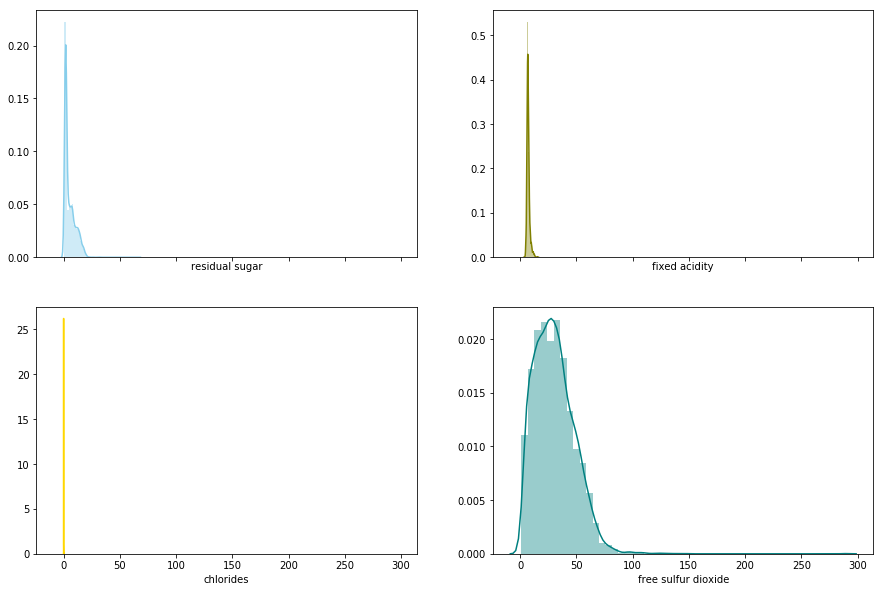

In [91]:
f, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
sns.distplot( data["residual sugar"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["fixed acidity"] , color="olive", ax=axes[0, 1])
sns.distplot( data["chlorides"] , color="gold", ax=axes[1, 0])
sns.distplot( data["free sulfur dioxide"] , color="teal", ax=axes[1, 1])


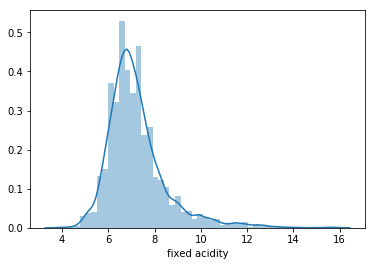

In [9]:
sns.distplot(data['fixed acidity'])

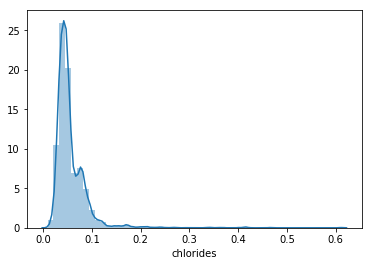

In [10]:
sns.distplot(data['chlorides'])

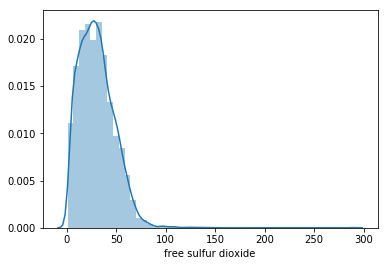

In [11]:
sns.distplot(data['free sulfur dioxide'])

## Data Cleaning & Transformation:

## Data modelling:

We will create a basis model using a Linear regression. Then we will compare enhanced algorithms with this basic one.

In [12]:
data.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,quality,red,residual sugar,sulphates,total sulfur dioxide,volatile acidity,white
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.0,1.9,0.56,34.0,0.70,0.0
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,5,1.0,2.6,0.68,67.0,0.88,0.0
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,5,1.0,2.3,0.65,54.0,0.76,0.0
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,6,1.0,1.9,0.58,60.0,0.28,0.0
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.0,1.9,0.56,34.0,0.70,0.0


In [13]:
from sklearn.linear_model import LinearRegression

#### Basic model:

In [14]:
model = LinearRegression(normalize=True)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
data.columns

Index(['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity',
       'free sulfur dioxide', 'pH', 'quality', 'red', 'residual sugar',
       'sulphates', 'total sulfur dioxide', 'volatile acidity', 'white'],
      dtype='object')

In [140]:
predictors=['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity',
       'free sulfur dioxide', 'pH', 'red', 'residual sugar',
       'sulphates', 'total sulfur dioxide', 'volatile acidity', 'white']

X = data[predictors]
Y=data['quality']

In [141]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1988)

In [142]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [143]:
y_predicted = model.predict(x_test)

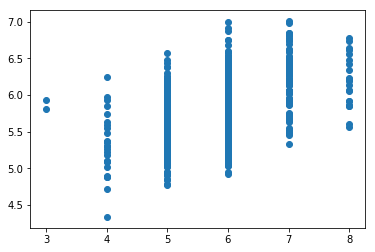

In [144]:
plt.scatter(y_test, y_predicted)

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [102]:
mean_absolute_error(y_test, y_predicted)

0.5670113371196379

In [103]:
mean_squared_error(y_test, y_predicted)

0.532848723757367

In [104]:
r2_score(y_test, y_predicted)

0.2525834693269873

In [105]:
sum(abs(y_predicted-y_test))/len(y_predicted)

0.5670113371196379

Now we will use a stratified Kfold (as the data is unbalanced) to better adjust the train/test split.

In [106]:
from sklearn.model_selection import StratifiedKFold

In [107]:
def stratified_kfold (model, n_folds, predictors_):
    error = []
    skf = StratifiedKFold(n_splits=n_folds)
    X = data[predictors_]
    Y = data['quality']
    
    for train_index, test_index in skf.split(X, Y):
        x_train = X.iloc[train_index]
        y_train = Y.iloc[train_index]
        
        x_test = X.iloc[test_index]
        y_test = Y.iloc[test_index]
        
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)
        
        #Scoring
        error.append([mean_absolute_error(y_test, y_predicted), mean_squared_error(y_test, y_predicted)])
        
    return error   

In [108]:
output = stratified_kfold(model, 5, predictors)
output = np.array(output)
output

array([[0.68503527, 0.75450614],
       [0.63957297, 0.64738817],
       [0.57904986, 0.55803172],
       [0.56318864, 0.51269679],
       [0.60769121, 0.60819273]])

In [109]:
print("Mean absolute error: ", output[:,0].mean() ,"\nMean squared error: ", output[:,1].mean())

Mean absolute error:  0.6149075898218642 
Mean squared error:  0.6161631099761141


Just getting a better samples for scoring the model we can see that it was even a worse model than it seems.

We will try to improve scoring just using feature selection.
### Feature selection:

In [110]:
from sklearn.feature_selection import RFE

In [111]:
selector = RFE(model, n_features_to_select=6, step=1)

In [112]:
selector.fit(x_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True),
  n_features_to_select=6, step=1, verbose=0)

In [113]:
selector.support_

array([ True,  True, False,  True, False, False, False,  True, False,
        True, False,  True, False])

In [114]:
selector.ranking_

array([1, 1, 6, 1, 4, 7, 3, 1, 5, 1, 8, 1, 2])

In [115]:
predictors_reduced = []
count=0

for a in selector.support_:
    if a == True:
        predictors_reduced.append(predictors[count])
    count+=1
    
predictors_reduced

['alcohol', 'chlorides', 'density', 'red', 'sulphates', 'volatile acidity']

Let's see the scoring using just the important predictors:

In [116]:
output_FS = stratified_kfold(model, 5, predictors_reduced)
output_FS = np.array(output_FS)
output_FS

array([[0.62517026, 0.64113775],
       [0.61668121, 0.61644886],
       [0.59483408, 0.57980742],
       [0.57329174, 0.5327822 ],
       [0.61602147, 0.61776119]])

In [117]:
print("Mean absolute error: ", output_FS[:,0].mean() ,"\nMean squared error: ", output_FS[:,1].mean())

Mean absolute error:  0.605199750344066 
Mean squared error:  0.5975874832170603


### What about a Lasso regression to see the effect of removing variables?

In [118]:
from sklearn.linear_model import Lasso

In [119]:
model_lasso = Lasso(normalize=True, alpha=0.5)

In [120]:
output_lasso = stratified_kfold(model_lasso, 5, predictors)
output_lasso = np.array(output_lasso)
output_lasso

array([[0.68648707, 0.76486926],
       [0.68608857, 0.76347747],
       [0.68608857, 0.76347747],
       [0.68476455, 0.76047071],
       [0.68432107, 0.7599812 ]])

In [121]:
print("Mean absolute error: ", output_lasso[:,0].mean() ,"\nMean squared error: ", output_lasso[:,1].mean())

Mean absolute error:  0.6855499656966202 
Mean squared error:  0.762455223553563


In [122]:
pd.Series(model_lasso.coef_, index=predictors)

alcohol                 0.0
chlorides              -0.0
citric acid             0.0
density                -0.0
fixed acidity          -0.0
free sulfur dioxide     0.0
pH                      0.0
red                    -0.0
residual sugar         -0.0
sulphates               0.0
total sulfur dioxide   -0.0
volatile acidity       -0.0
white                   0.0
dtype: float64

In [123]:
model_lasso.intercept_ #independent term in decision function.

5.818653846153846

In [124]:
data.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,quality,red,residual sugar,sulphates,total sulfur dioxide,volatile acidity,white
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.0,1.9,0.56,34.0,0.70,0.0
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,5,1.0,2.6,0.68,67.0,0.88,0.0
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,5,1.0,2.3,0.65,54.0,0.76,0.0
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,6,1.0,1.9,0.58,60.0,0.28,0.0
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.0,1.9,0.56,34.0,0.70,0.0


More complex

### XGBOOST

In [125]:
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
model_XGBOOST = GradientBoostingRegressor(learning_rate=0.2, n_estimators=2, min_samples_split=50, min_samples_leaf=20, max_features=10)

In [135]:
output_XGBOOST = stratified_kfold(model_XGBOOST, 5, predictors)
output_XGBOOST

[[0.6737001134365002, 0.6955649603860097],
 [0.6519641028270423, 0.6736967342916197],
 [0.6297266631045757, 0.654155094575632],
 [0.6074435044676032, 0.626253815767943],
 [0.6123443930143433, 0.6557318755684537]]

For tunning the hiperparameters we will use a GridCV.

In [136]:
from sklearn.model_selection import GridSearchCV

In [146]:
parameters = {"loss": ["ls"], "learning_rate": [0.05, 0.09, 0.1, 0.15, 0.2, 0.5 ], "n_estimators": [10, 50, 100], "min_samples_split" : [50], "min_samples_leaf": [20], "max_features": [7,10,13]}

In [147]:
GCV = GridSearchCV(model_XGBOOST, param_grid=parameters, cv=5, n_jobs=4, scoring='mean_absolute_error')

In [148]:
output_CV_XGBOOST = GCV.fit(X,Y)

In [149]:
output_CV_XGBOOST.best_estimator_  # Best model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.09, loss='ls', max_depth=3, max_features=7,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=50, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [150]:
output_CV_XGBOOST.best_score_

-0.5670768686676787

In [1]:
y_predicted = output_CV_XGBOOST.best_estimator_.predict(x_test)

NameError: name 'output_CV_XGBOOST' is not defined

In [152]:
results = pd.DataFrame(output_CV_XGBOOST.cv_results_)
results

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Program Files\Anaconda\lib\site-packages\sklearn\ut

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_loss,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.043754,0.003129,-0.628804,-0.618731,0.05,ls,7,20,50,10,...,-0.650806,-0.615090,-0.651486,-0.617826,-0.545945,-0.634996,0.011689,6.258297e-03,0.043389,0.008451
1,0.178973,0.000809,-0.587393,-0.552708,0.05,ls,7,20,50,50,...,-0.598981,-0.546328,-0.591386,-0.544283,-0.547843,-0.569256,0.006006,9.905310e-04,0.023914,0.009665
2,0.319554,0.006032,-0.576907,-0.523871,0.05,ls,7,20,50,100,...,-0.586085,-0.518140,-0.581111,-0.516428,-0.537642,-0.537150,0.003890,4.211871e-03,0.021889,0.008129
3,0.053941,0.000404,-0.625323,-0.615996,0.05,ls,10,20,50,10,...,-0.647568,-0.613635,-0.644186,-0.613874,-0.544357,-0.635886,0.004477,8.075714e-04,0.042810,0.010385
4,0.231378,0.002012,-0.586582,-0.550991,0.05,ls,10,20,50,50,...,-0.600284,-0.545539,-0.590688,-0.542432,-0.538146,-0.565835,0.015575,4.023075e-03,0.027270,0.008846
5,0.412867,0.002415,-0.573637,-0.521762,0.05,ls,10,20,50,100,...,-0.583982,-0.516174,-0.580538,-0.514582,-0.535727,-0.535029,0.005875,3.899524e-03,0.022179,0.007914
6,0.063984,0.000807,-0.623418,-0.614076,0.05,ls,13,20,50,10,...,-0.639192,-0.609704,-0.642646,-0.613172,-0.541475,-0.632978,0.003696,9.888939e-04,0.042874,0.009981
7,0.269929,0.005224,-0.586086,-0.550106,0.05,ls,13,20,50,50,...,-0.595516,-0.544203,-0.592775,-0.542336,-0.540439,-0.564101,0.007108,4.328995e-03,0.026861,0.008372
8,0.502125,0.005231,-0.573363,-0.521819,0.05,ls,13,20,50,100,...,-0.581009,-0.516285,-0.580760,-0.513249,-0.537573,-0.535335,0.000969,3.929784e-03,0.021621,0.008540
9,0.040648,0.000404,-0.612442,-0.596287,0.09,ls,7,20,50,10,...,-0.633729,-0.592960,-0.621311,-0.590727,-0.543216,-0.614024,0.000807,8.087158e-04,0.036660,0.009414
